In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
covid = pd.read_csv('covid.csv')
crypto = pd.read_csv('crypto.csv')

# Problem 1

## 1. Banyaknya data.

In [7]:
len(covid)

27138

## 2. 5 data pertama.

In [10]:
covid[:5]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,China,548,17,28,503,0,0,0,Western Pacific
1,2020-01-22,Japan,2,0,0,2,0,0,0,Western Pacific
2,2020-01-22,South Korea,1,0,0,1,0,0,0,Western Pacific
3,2020-01-22,Taiwan*,1,0,0,1,0,0,0,Western Pacific
4,2020-01-22,Thailand,2,0,0,2,0,0,0,South-East Asia


## 3. Data ke 406 sampai 410 (inklusif).

In [13]:
covid[405:410]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
405,2020-02-11,Germany,16,0,0,16,2,0,0,Europe
406,2020-02-11,India,3,0,0,3,0,0,0,South-East Asia
407,2020-02-11,Italy,3,0,0,3,0,0,0,Europe
408,2020-02-11,Japan,27,0,9,18,1,0,5,Western Pacific
409,2020-02-11,Malaysia,18,0,3,15,0,0,2,Western Pacific


## 4. Banyaknya data untuk masing - masing negara.

In [15]:
covid['Country/Region'].value_counts()

South Korea              188
US                       188
Japan                    188
Thailand                 188
China                    188
                        ... 
Sao Tome and Principe    113
Yemen                    109
Comoros                   89
Tajikistan                89
Lesotho                   76
Name: Country/Region, Length: 187, dtype: int64

## 5. Nilai korelasi antara jumlah kasus terkonfirmasi dan jumlah kasus aktif.

In [17]:
covid['Confirmed'].corr(covid['Active'])

0.9497894846049655

### Apakah berkorelasi lurus, terbalik, atau tidak berkolerasi? Jelaskan.
Nilainya mendekati 1, jadi yaudah berkorelasi lurus.

# Problem 2

## 1. Data untuk negara Indonesia pada tanggal 3 Juni 2020.

In [20]:
covid.loc[(covid['Country/Region'] == 'Indonesia') & (covid['Date'] == '2020-06-03')]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
16933,2020-06-03,Indonesia,28233,1698,8406,18129,684,35,471,South-East Asia


## 2. Data untuk negara Indonesia dan Singapura (’Singapore’)

In [21]:
covid.loc[(covid['Country/Region'] == 'Indonesia') | (covid['Country/Region'] == 'Singapore')]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
8,2020-01-23,Singapore,1,0,0,1,1,0,0,Western Pacific
17,2020-01-24,Singapore,3,0,0,3,2,0,0,Western Pacific
28,2020-01-25,Singapore,3,0,0,3,0,0,0,Western Pacific
41,2020-01-26,Singapore,4,0,0,4,1,0,0,Western Pacific
56,2020-01-27,Singapore,5,0,0,5,1,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
26727,2020-07-25,Singapore,49888,27,45352,4509,513,0,180,Western Pacific
26844,2020-07-26,Indonesia,98778,4781,56655,37342,1492,67,1301,South-East Asia
26914,2020-07-26,Singapore,50369,27,45521,4821,481,0,169,Western Pacific
27031,2020-07-27,Indonesia,100303,4838,58173,37292,1525,57,1518,South-East Asia


## 3. Ada berapa negara dengan jumlah kasus terkonfirmasi dibawah 100000 pada tanggal 27 Juli 2020?

In [23]:
len(covid.loc[(covid['Confirmed'] < 100000) & (covid['Date'] == '2020-07-27')])

163

## 4. Pada tanggal berapa kasus pertama di Indonesia muncul?

In [34]:
# sortir berdasar date dulu
# habis itu ambil data pertama
covid.loc[covid['Country/Region'] == 'Indonesia'].sort_values(['Date'], ascending=[1])[:1]['Date']

1146    2020-03-02
Name: Date, dtype: object

## 5. Pada tanggal berapa jumlah kasus aktif terbanyak di China terjadi?

In [44]:
# cari data terbanyak
max_case = covid['Active'].loc[covid['Country/Region'] == 'China'].max()

# cari data tanggal yang tanggal aktifnya segitu
covid['Date'].loc[covid['Active'] == max_case]

561    2020-02-17
Name: Date, dtype: object

# Problem 3

## 1. Histogram distribusi jumlah data per WHO Region.

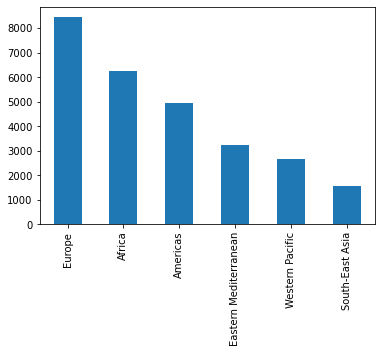

In [46]:
covid['WHO Region'].value_counts().plot(kind='bar')

## 2. Line chart untuk kasus terkonfirmasi Indonesia.

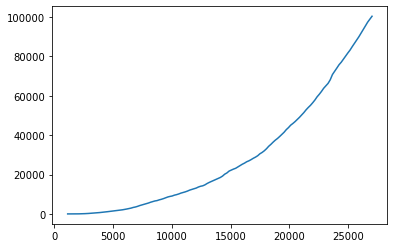

In [58]:
# sort berdasar waktu, lalu plot kind line
covid.loc[covid['Country/Region'] == 'Indonesia'].sort_values('Date', ascending=[1])['Confirmed'].plot(kind='line')

## 3. Pie chart banyaknya data untuk masing - masing WHO Region.

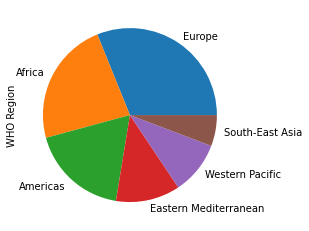

In [61]:
covid['WHO Region'].value_counts().plot(kind='pie')

## 4. Scatter plot dengan jumlah kasus kesembuhan sebagai sumbu x dan jumlah kematian sebagai sumbu y untuk negara Malaysia.

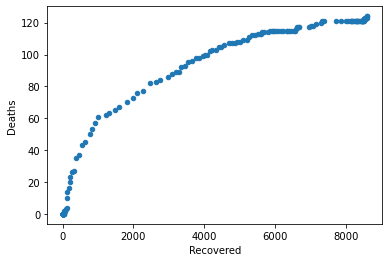

In [62]:
covid_malay = covid.loc[covid['Country/Region'] == 'Malaysia']

covid_malay.plot(kind='scatter', x='Recovered', y='Deaths')

## 5. Pie chart untuk membandingkan jumlah negara yang memiliki kasus terkonfirmasi untuk setiap WHO Region pada tanggal 2 Februari 2020.

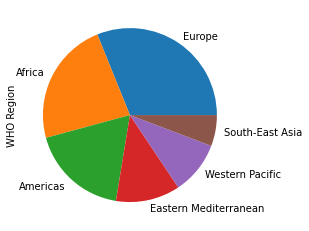

In [73]:
covid.loc[covid['Confirmed'] > 0]['WHO Region'].value_counts().plot(kind='pie')